<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
# Hedge: IT0005408502 , 
# Duración 3.33,  
# Convexidad: 1132.22
# Posicion: -2410000
# Precio: 104

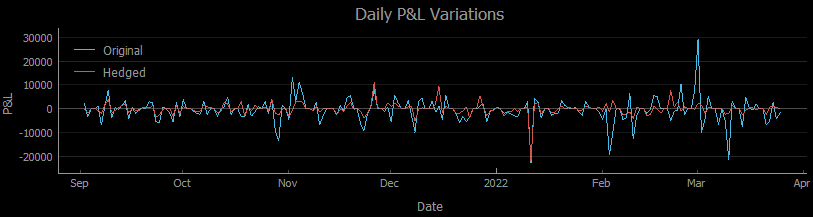

In [16]:
# Hedge: IT0005390874 , 
# Duración 4.71,  
# Convexidad: 1070.54
# Posición: -1710000
# Precio: 99.2

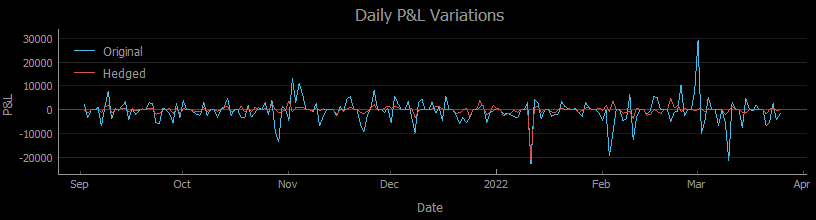

In [ ]:
# Hedge: IT0005365165, 
# Duración 6.64,  
# Convexidad -292.75
# Posicion: -1090000
# Precio: 111.0

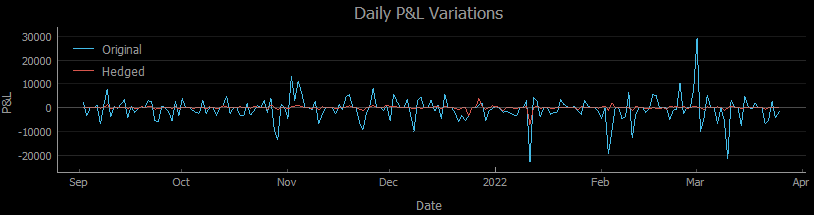

In [11]:
# ---------------- Posición: IT0005413171, Duración 8.03, 1000000 ---------------- 

In [12]:
# Hedge: IT0005449969, 
# Duración 9.16, 
# Convexidad -135.53
# Posicion: -949000
# Precio: 92.0

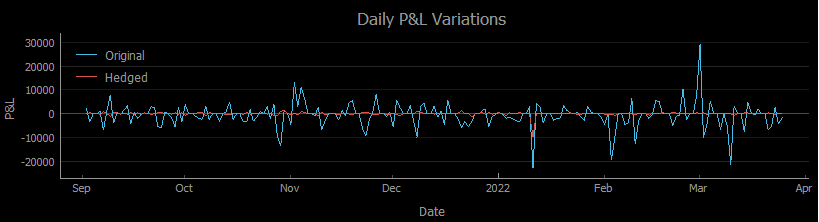

In [13]:
# Hedge: IT0005466013 , 
# Duración 9.6,  
# Convexidad: -292.75
# Posicion: -913000
# Precio: 91.1

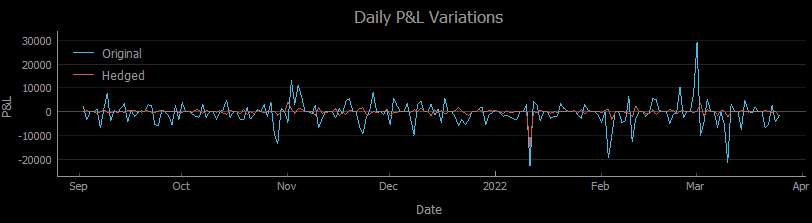

In [14]:
# Hedge: IT0005433195, 
# Duración 13.7, 
# Convexidad -1950.07
# Posicion: -757000
# Precio 84.9

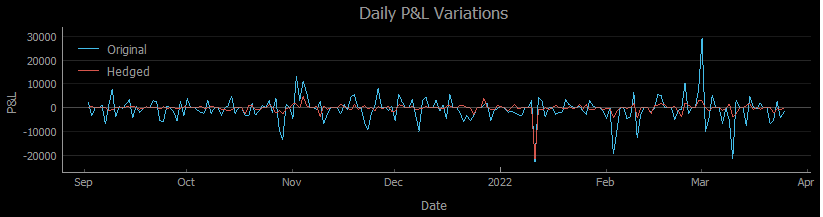

In [15]:
# Hedge: IT0005425233,
# Duración 22.3,  
# Convexidad -8256.29
# Posicion: -425000
# Precio: 84.4

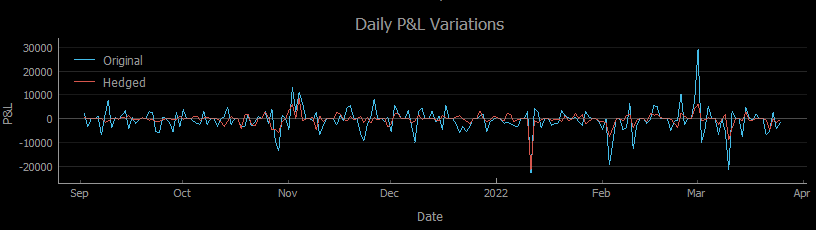

In [24]:
hedges = [
    {"Hedge": "IT0005408502" , 
"Duracion":3.33,  
"Convexidad": 1132.22,
"Posicion": -2410000,
"Precio": 104},

{"Hedge": "IT0005390874", 
"Duracion":4.71,  
"Convexidad": 1070.54,
"Posicion": -1710000,
"Precio": 99.2},

{"Hedge": "IT0005365165", 
"Duracion":6.64,  
"Convexidad":-292.75,
"Posicion": -1090000,
"Precio": 111.0},

{"Hedge": "IT0005449969", 
"Duracion":9.16, 
"Convexidad":-135.53,
"Posicion": -949000,
"Precio": 92.0},

{"Hedge": "IT0005466013" , 
"Duracion":9.6,  
"Convexidad": -292.75,
"Posicion": -913000,
"Precio": 91.1},

{"Hedge": "IT0005433195", 
"Duracion":13.7, 
"Convexidad":-1950.07,
"Posicion": -757000,
"Precio":84.9},

{"Hedge": "IT0005425233",
"Duracion":22.3,  
"Convexidad":-8256.29,
"Posicion": -425000,
"Precio": 84.4}
]

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
hedges = pd.DataFrame.from_dict(hedges)

In [28]:
hedges['Valor'] = hedges['Posicion']*hedges['Precio']/100

In [31]:
hedges['Comision'] = hedges['Valor']*0.1/100

In [39]:
hedges['Spread'] = hedges['Duracion']*2.16/100

In [41]:
hedges['SpreadCost'] = hedges['Spread']*hedges['Posicion']/100

In [45]:
hedges['TotalCost'] = hedges['Comision']+hedges['SpreadCost']

In [50]:
hedges['OptCost'] = hedges['TotalCost']*np.abs(hedges['Convexidad'])*1E-6

In [66]:
hedges

,Hedge,Duracion,Convexidad,Posicion,Precio,Valor,Comision,Spread,SpreadCost,TotalCost,OptCost
0,IT0005408502,3.33,1132.22,-2410000,104.0,-2506400.0,-2506.400,0.071928,-1733.46480,-4239.86480,-4.800460
1,IT0005390874,4.71,1070.54,-1710000,99.2,-1696320.0,-1696.320,0.101736,-1739.68560,-3436.00560,-3.678381
2,IT0005365165,6.64,-292.75,-1090000,111.0,-1209900.0,-1209.900,0.143424,-1563.32160,-2773.22160,-0.811861
3,IT0005449969,9.16,-135.53,-949000,92.0,-873080.0,-873.080,0.197856,-1877.65344,-2750.73344,-0.372807
4,IT0005466013,9.60,-292.75,-913000,91.1,-831743.0,-831.743,0.207360,-1893.19680,-2724.93980,-0.797726
5,IT0005433195,13.70,-1950.07,-757000,84.9,-642693.0,-642.693,0.295920,-2240.11440,-2882.80740,-5.621676
6,IT0005425233,22.30,-8256.29,-425000,84.4,-358700.0,-358.700,0.481680,-2047.14000,-2405.84000,-19.863313


$$ L = \frac{CN}{100}(P+S) $$

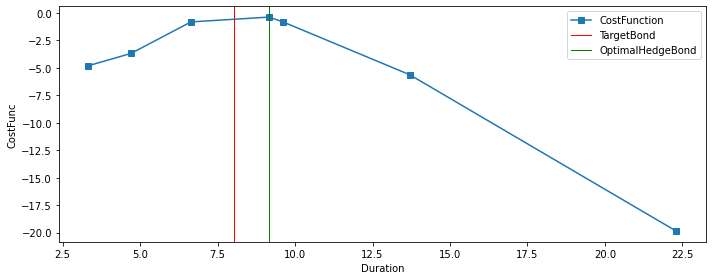

In [65]:
plt.figure(figsize=(10,4))
plt.plot(hedges['Duracion'], hedges['OptCost'], 's-', label='CostFunction')
plt.axvline(8.03, label='TargetBond', color='red', lw=1)
plt.axvline(9.16, label='OptimalHedgeBond', color='green', lw=1)
plt.xlabel("Duration")
plt.ylabel("CostFunc")
plt.legend()
plt.tight_layout()
plt.show()